In [4]:
!pip install pandas

In [6]:
!pip install matplotlib seaborn

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-win_amd64.whl (51 kB)


In [9]:
!pip install statsmodels

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()

In [12]:
data = pd.DataFrame(data = boston.data, columns=boston.feature_names)
data['SalesPrice'] = pd.Series(boston.target)  # adding the terget column (SalesPrice)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalesPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  SalesPrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
data.isnull().sum() 

CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
SalesPrice    0
dtype: int64

In [15]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalesPrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Meaning of Features

$CRIM$: Per capita crime rate by town

$ZN$: Proportion of residential land zoned for lots over 25,000 sq. ft

$INDUS$: Proportion of non-retail business acres per town

$CHAS$: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

$NOX$: Nitric oxide concentration (parts per 10 million)

$RM$: Average number of rooms per dwelling

$AGE$: Proportion of owner-occupied units built prior to 1940

$DIS$: Weighted distances to five Boston employment centers

$RAD$: Index of accessibility to radial highways

$TAX$: Full-value property tax rate per $10,000

$PTRATIO$: Pupil-teacher ratio by town

$B$: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

$LSTAT$: Percentage of lower status of the population

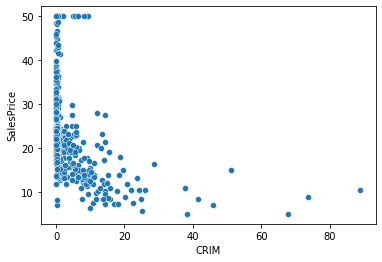

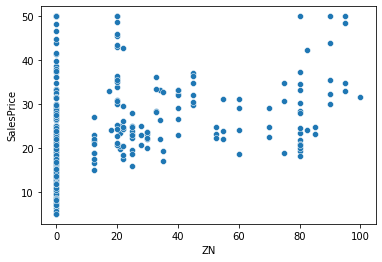

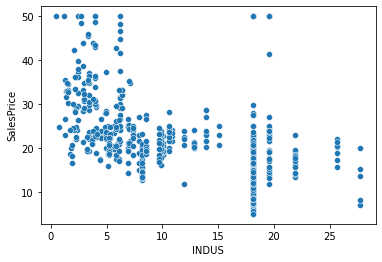

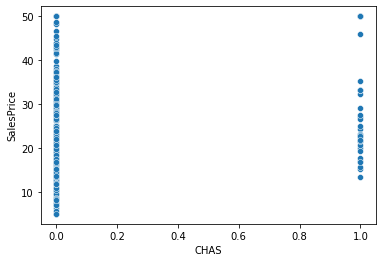

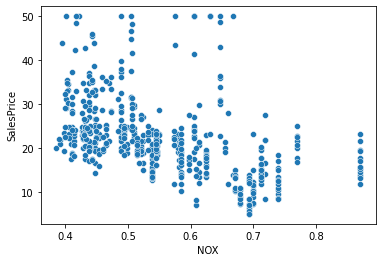

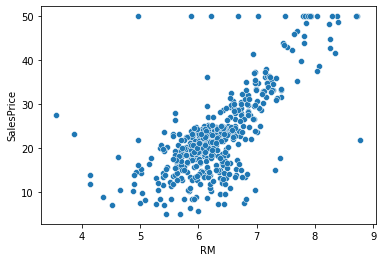

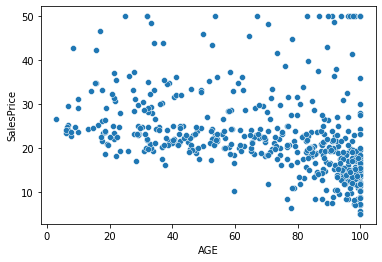

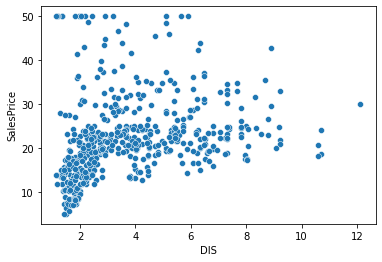

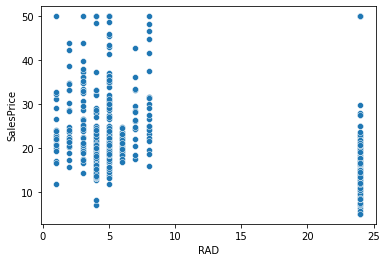

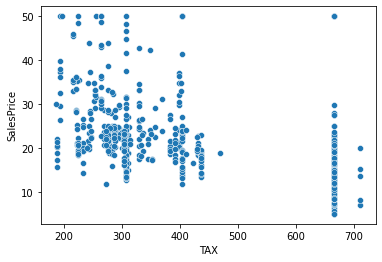

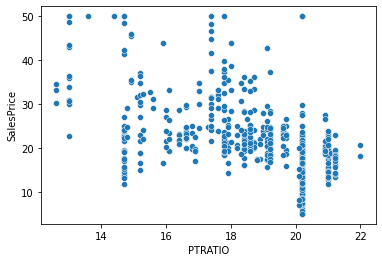

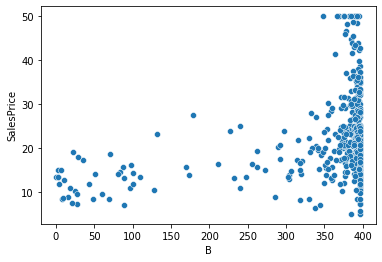

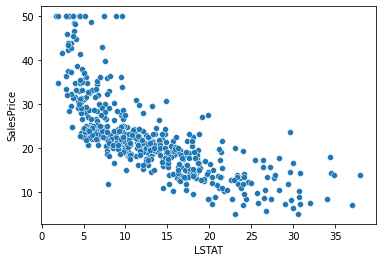

In [16]:
for i in boston.feature_names:
    if i != "SalesPrice":
        sns.scatterplot(x=data[i] , y=data['SalesPrice'])
        plt.show()

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


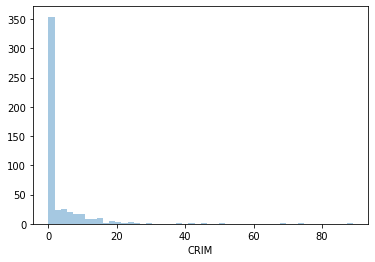

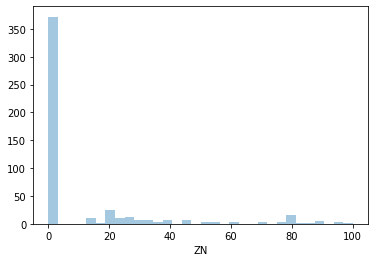

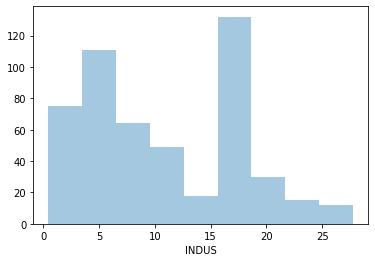

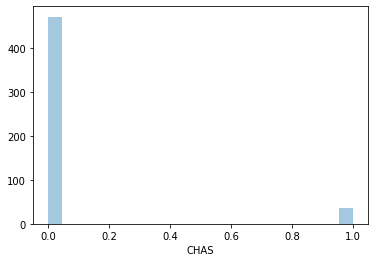

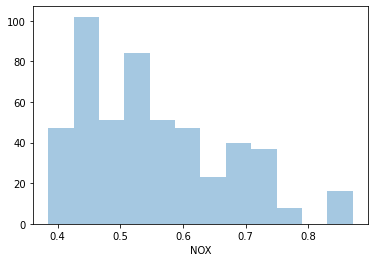

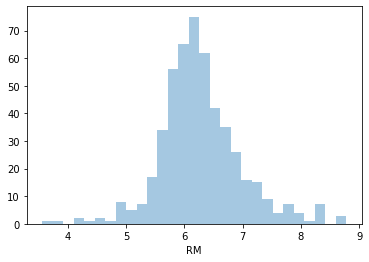

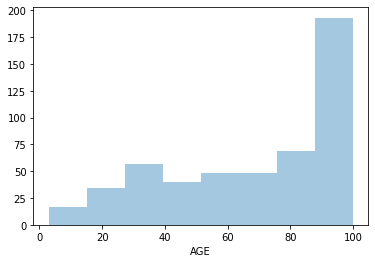

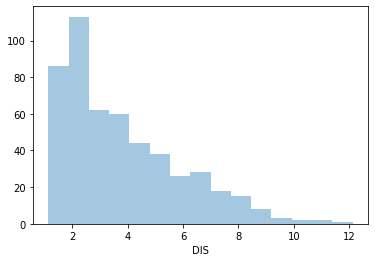

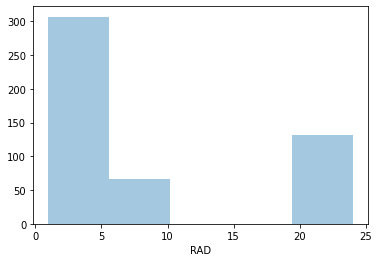

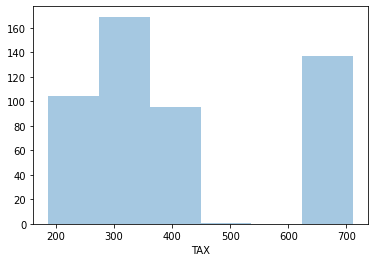

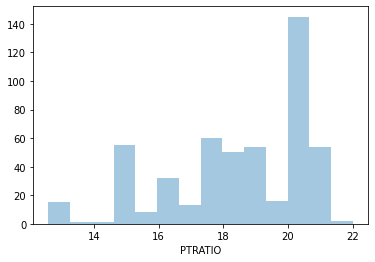

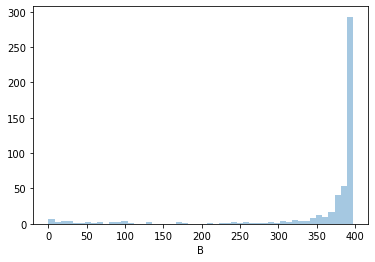

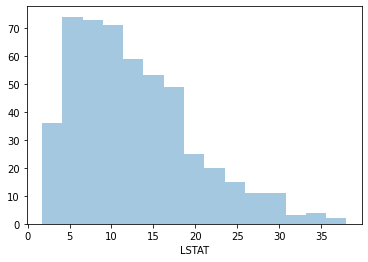

In [17]:
for i in boston.feature_names:
    sns.distplot(a=data[i],kde=False)
    plt.show()

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


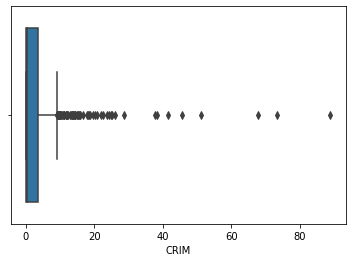

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


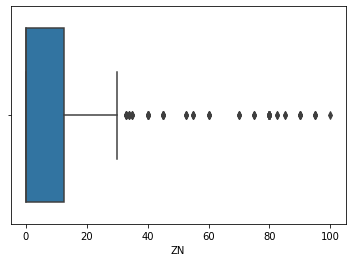

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


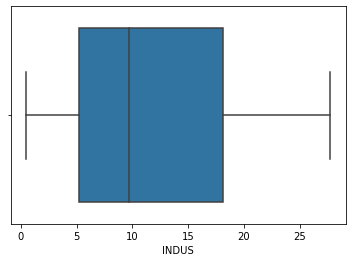

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


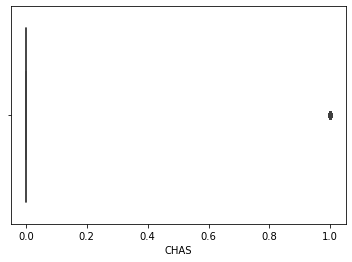

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


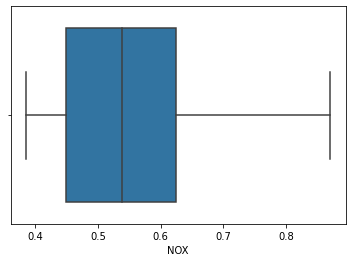

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


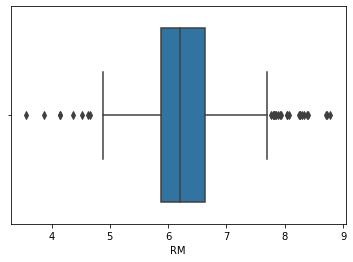

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


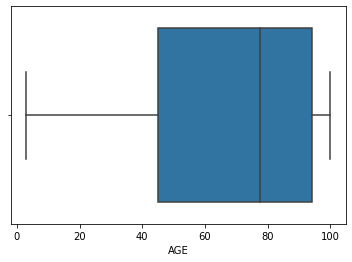

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


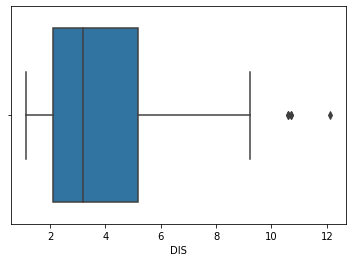

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


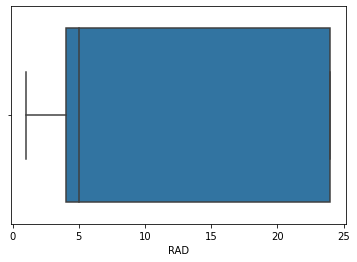

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


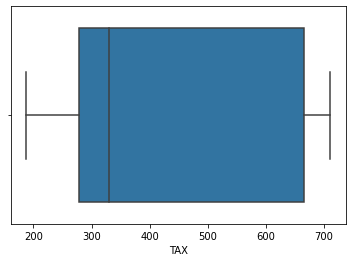

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


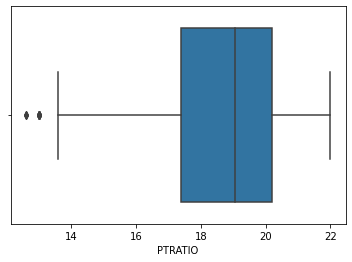

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


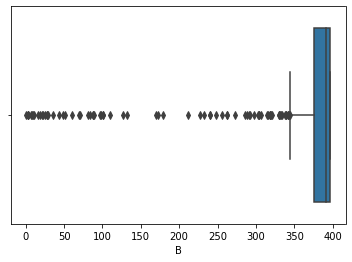

c:\users\rajdi\anaconda3\envs\my regression deployment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


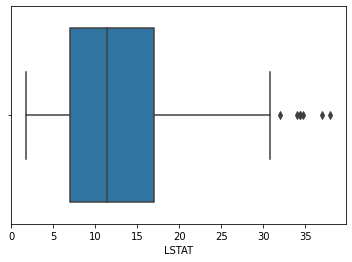

In [18]:
# checking the outliers....

for i in boston.feature_names:
    sns.boxplot(data[i])
    plt.show()

<AxesSubplot:>

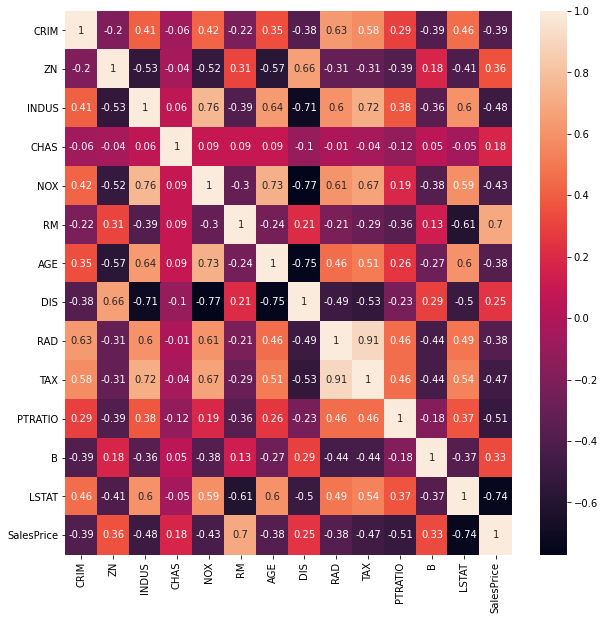

In [19]:
# checking correlations across the dataset:-

correlation_matrix = data.corr().round(2)

plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

- we can see, there is very little relation b/w  SalesPrice and CHAS(Charles River dummy variable). So we can exclude the feature from dataset.

- correlation b/w RAD and TAX  is 0.91 ,which is very high. There must be multi-colinearity issue. We can check using variance inflation factor.

In [20]:
# splitting the data into dependent and independent dataset >>>>>>
X = data.drop('SalesPrice',axis = 1)
y = data.SalesPrice

In [21]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X_scaled =X_scale.fit_transform(X)
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [23]:
vif = pd.DataFrame()
VIF = [variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif['VIF'] = VIF
vif

,features,VIF
0,CRIM,1.792192
1,ZN,2.298758
2,INDUS,3.991596
3,CHAS,1.073995
4,NOX,4.393720
5,RM,1.933744
6,AGE,3.100826
7,DIS,3.955945
8,RAD,7.484496
9,TAX,9.008554


Here we can see the TAX and RAD has variance inflation factor more than 5....
so there will be multicorelation between them, and we can remove any one..

- For my model training , I will exclude the RAD because , RAD have gretter correlation with the SalesPrice..
and 
- I also exclude the CHAS  , because it has less correlation with SalesPrice....

In [24]:
final_dataset = X.drop(['RAD','CHAS'],axis=1 )
final_dataset.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [25]:
final_dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [26]:
final_scale = StandardScaler()
final_scaled =final_scale.fit_transform(final_dataset)
final_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [27]:
train_x,test_x,train_y,test_y = train_test_split(final_scaled , y , random_state=101 , test_size = 0.2)

In [28]:
train_x.shape

(404, 11)

In [29]:
test_x.shape

(102, 11)

In [30]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model.score(train_x,train_y)

0.7321807484526326

In [32]:
model.score(test_x,test_y)

0.6899972761334554

In [33]:
from sklearn.metrics import r2_score

In [34]:
def adj_rsquared(x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [35]:
adj_rsquared(train_x,train_y)

0.7246654123122728

So our adj_r2 (0.7246654123122728) is less than our rsquared value (0.7246654123122728).. so let's see our model is over fitting or not buy useing regularization methods


In [36]:
alphas = np.random.uniform(low=0 ,high =10,size=(100,))
ridgeCV = RidgeCV(alphas=alphas,cv=20,normalize = True)
ridgeCV.fit(train_x,train_y)

RidgeCV(alphas=array([3.1936348 , 2.23626825, 7.18689502, 7.45035267, 7.18351855,
       9.06620205, 8.71195019, 2.7095753 , 9.31372798, 9.78854718,
       9.73894564, 0.66815548, 0.68774367, 2.44372304, 6.39674676,
       0.27799339, 1.55858314, 2.42818797, 4.93889208, 7.54948455,
       2.08285344, 1.4018275 , 6.74700807, 4.96122188, 8.94038696,
       0.96668131, 4.5349239 , 2.58626889, 5.11022428, 8.22659321,
       2....
       0.1465765 , 5.44308688, 4.34887642, 9.304169  , 7.99322479,
       1.39387648, 6.96666798, 7.46537714, 0.13302724, 9.9797059 ,
       4.42552498, 3.70004416, 0.96064019, 2.94775387, 6.57205288,
       5.10686112, 8.05013771, 0.12439262, 3.34905452, 7.87703794,
       9.77240597, 7.41445042, 1.49412596, 2.22837432, 3.64110396]),
        cv=20, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [37]:
alpha =ridgeCV.alpha_

In [38]:
ridge_model = Ridge(alpha=alpha , normalize=True , max_iter= 1000000000)
ridge_model.fit(train_x,train_y)

Ridge(alpha=0.12439261531854706, copy_X=True, fit_intercept=True,
      max_iter=1000000000, normalize=True, random_state=None, solver='auto',
      tol=0.001)

In [39]:
print(ridge_model.score(train_x,train_y))
print(model.score(train_x,train_y))

0.7242624911565736
0.7321807484526326


Scores are very close to eachother.. lets try lasso ..

In [40]:
lassocv = LassoCV( normalize=True ,cv=20, max_iter= 1000000000)
lassocv.fit(train_x,train_y)

LassoCV(alphas=None, copy_X=True, cv=20, eps=0.001, fit_intercept=True,
        max_iter=1000000000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [41]:
alpha2 = lassocv.alpha_
alpha2

0.004602289361036019

In [42]:
lasso_model = Lasso(alpha = alpha2)
lasso_model.fit(train_x,train_y)

Lasso(alpha=0.004602289361036019, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
lasso_model.score(train_x,train_y)

0.7321718445995842

In [44]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =20)

elasticCV.fit(train_x, train_y)

ElasticNetCV(alphas=None, copy_X=True, cv=20, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [45]:
alpha3 =elasticCV.alpha_
alpha3

0.050489374496182335

In [46]:
elasticnet_model = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_model.fit(train_x, train_y)

ElasticNet(alpha=0.050489374496182335, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [47]:
elasticnet_model.score(train_x,train_y)

0.7310311259084004

In [48]:
print(ridge_model.score(train_x,train_y))
print(model.score(train_x,train_y))
print(lasso_model.score(train_x,train_y))
print(elasticnet_model.score(train_x,train_y))

0.7242624911565736
0.7321807484526326
0.7321718445995842
0.7310311259084004


the all scores are almost closer to each other,, so we can conclue my model is not overfitted

In [49]:
import pickle
filename = "My_Regression_model.pickle"
pickle.dump(model , open(filename,'wb'))

In [50]:
loaded_model = pickle.load(open(filename,'rb'))

In [51]:
a=loaded_model.predict(final_scale.transform([[300,110,5,5,5,10,1,34,2,11,10]]))
a

array([-42.28485776])

In [52]:
import pickle
filename = "My_Regression_final_scale.pickle"
pickle.dump(final_scale , open(filename,'wb'))

In [53]:
loaded_scale = pickle.load(open("My_Regression_final_scale.pickle",'rb'))

In [54]:
loaded_scale.transform([[0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98]])

array([[-0.41978194,  0.28482986, -1.2879095 , -0.14421743,  0.41367189,
        -0.12001342,  0.1402136 , -0.66660821, -1.45900038,  0.44105193,
        -1.0755623 ]])

In [55]:
a=loaded_model.predict(final_scale.transform([[0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98]]))
a

array([31.21539528])

In [56]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: SalesPrice, Length: 506, dtype: float64